✅ Synthetic data generated and saved!
   Time points: 1000
   Voltage range: -65.0 to 0.0 mV
   m_true range:  0.050 to 0.974


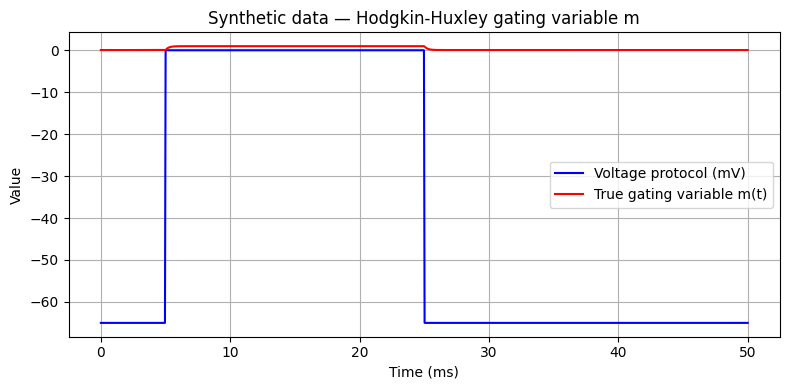

In [2]:
import os
os.makedirs('data', exist_ok=True)   # ← THIS LINE FIXES THE ERROR

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ==================== HODGKIN-HUXLEY GATING VARIABLE 'm' ====================
def alpha_m(V):
    return 0.1 * (V + 40.0) / (1.0 - np.exp(-(V + 40.0) / 10.0))

def beta_m(V):
    return 4.0 * np.exp(-(V + 65.0) / 18.0)

def dm_dt(m, t, V_func):
    """dm/dt = α(1-m) - βm"""
    V = V_func(t)
    return alpha_m(V) * (1 - m) - beta_m(V) * m

# Voltage step protocol
def voltage_protocol(t):
    if 5 < t < 25:
        return 0.0
    return -65.0

# Generate data
t = np.linspace(0, 50, 1000)
V_array = np.array([voltage_protocol(ti) for ti in t])
m0 = [0.05]
m_true = odeint(dm_dt, m0, t, args=(voltage_protocol,))[:, 0]

# Save dataset
np.savez('data/synthetic_m.npz', t=t, V=V_array, m_true=m_true)

print("✅ Synthetic data generated and saved!")
print(f"   Time points: {len(t)}")
print(f"   Voltage range: {V_array.min():.1f} to {V_array.max():.1f} mV")
print(f"   m_true range:  {m_true.min():.3f} to {m_true.max():.3f}")

# Plot
plt.figure(figsize=(8, 4))
plt.plot(t, V_array, 'b-', label='Voltage protocol (mV)')
plt.plot(t, m_true, 'r-', label='True gating variable m(t)')
plt.xlabel('Time (ms)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.title('Synthetic data — Hodgkin-Huxley gating variable m')
plt.tight_layout()
plt.show()